## Exploração de dados:

In [102]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle


In [103]:
# Importando a base de dados
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [104]:
# Renomeando as colunas
novos_nomes_colunas = {'age': 'idade', 'sex': 'genero', 'bmi': 'imc', 'children': 'filhos', 'smoker': 'fumante', 'region': 'regiao', 'charges': 'encargos'}
df_renomeado = df.rename(columns=novos_nomes_colunas)
df_renomeado.head()

,idade,genero,imc,filhos,fumante,regiao,encargos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [105]:
# traduzindo para o portugues
df_renomeado['genero'] = df_renomeado['genero'].replace(['male', 'female'], ['masculino', 'feminino'])
df_renomeado['fumante'] = df_renomeado['fumante'].replace(['yes', 'no'], ['sim', 'nao'])

valores_unicos_regiao = df_renomeado['regiao'].unique().tolist()
df_renomeado['regiao'] = df_renomeado['regiao'].replace(valores_unicos_regiao, ['sudoeste', 'sudeste', 'noroeste', 'nordeste'])

df_renomeado.head()

,idade,genero,imc,filhos,fumante,regiao,encargos
0,19,feminino,27.900,0,sim,sudoeste,16884.92400
1,18,masculino,33.770,1,nao,sudeste,1725.55230
2,28,masculino,33.000,3,nao,sudeste,4449.46200
3,33,masculino,22.705,0,nao,noroeste,21984.47061
4,32,masculino,28.880,0,nao,noroeste,3866.85520


In [106]:
# Explorando características
df_renomeado.shape

(1338, 7)

In [107]:
# Estatísticas descritivas
df_renomeado.describe()

,idade,imc,filhos,encargos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [108]:
# Estatísticas descritivas para colunas categoricas
df_renomeado.describe(include=['O'])

,genero,fumante,regiao
count,1338,1338,1338
unique,2,2,4
top,masculino,nao,sudeste
freq,676,1064,364


In [109]:
# Informações sobre o conjunto de dados
df_renomeado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1338 non-null   int64  
 1   genero    1338 non-null   object 
 2   imc       1338 non-null   float64
 3   filhos    1338 non-null   int64  
 4   fumante   1338 non-null   object 
 5   regiao    1338 non-null   object 
 6   encargos  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [110]:
# Checar se existem valores nulos
df_renomeado.isnull().sum()

idade       0
genero      0
imc         0
filhos      0
fumante     0
regiao      0
encargos    0
dtype: int64

In [111]:
# Checar se existem duplicacoes
existe_duplicacoes = df_renomeado.duplicated().any()
existe_duplicacoes

True

In [112]:
# Mostra as duplicacoes
df_renomeado[df_renomeado.duplicated()]

,idade,genero,imc,filhos,fumante,regiao,encargos
581,19,masculino,30.59,0,nao,noroeste,1639.5631


In [113]:
# Remove as duplicacoes
df_limpo = df_renomeado.drop_duplicates()
df_limpo

,idade,genero,imc,filhos,fumante,regiao,encargos
0,19,feminino,27.900,0,sim,sudoeste,16884.92400
1,18,masculino,33.770,1,nao,sudeste,1725.55230
2,28,masculino,33.000,3,nao,sudeste,4449.46200
3,33,masculino,22.705,0,nao,noroeste,21984.47061
4,32,masculino,28.880,0,nao,noroeste,3866.85520
...,...,...,...,...,...,...,...
1333,50,masculino,30.970,3,nao,noroeste,10600.54830
1334,18,feminino,31.920,0,nao,nordeste,2205.98080
1335,18,feminino,36.850,0,nao,sudeste,1629.83350
1336,21,feminino,25.800,0,nao,sudoeste,2007.94500


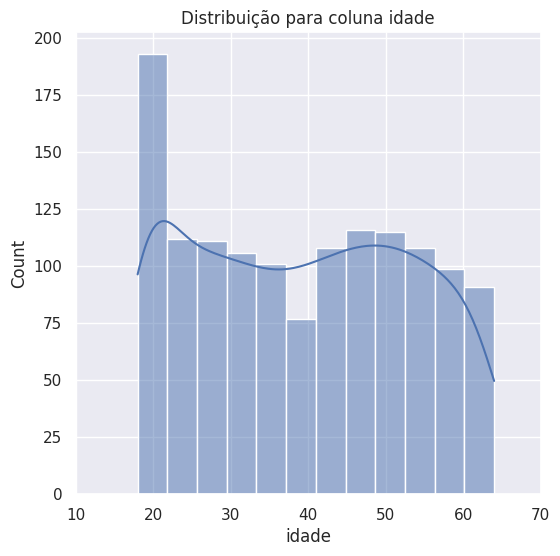

In [114]:
# Distribuição para coluna idade
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(df_limpo['idade'], kde=True)
plt.title('Distribuição para coluna idade')
plt.xlim(10, 70)
plt.show()

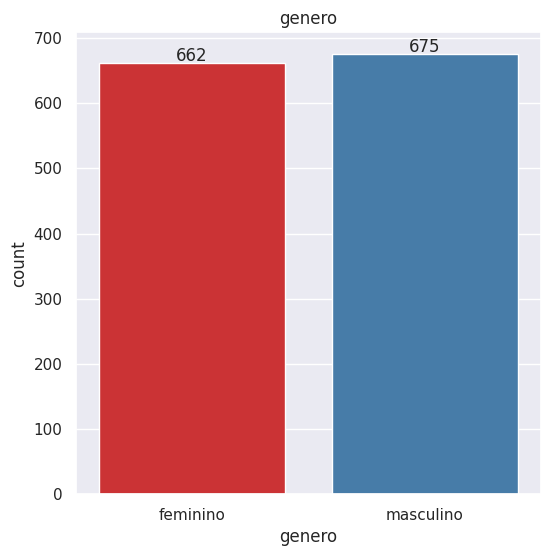

In [115]:
# Distribuição para coluna genero
sns.set()
plt.figure(figsize=(6,6))
ax = sns.countplot(x='genero', data=df_limpo, hue='genero', palette='Set1', legend=False)
plt.title('genero')

# Adiciona o valor da contagem no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

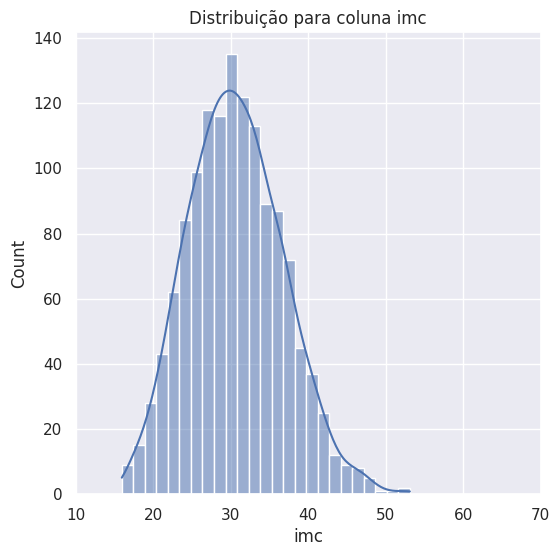

In [116]:
# Distribuição para coluna imc
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(df_limpo['imc'], kde=True)
plt.title('Distribuição para coluna imc')
plt.xlim(10, 70)
plt.show()

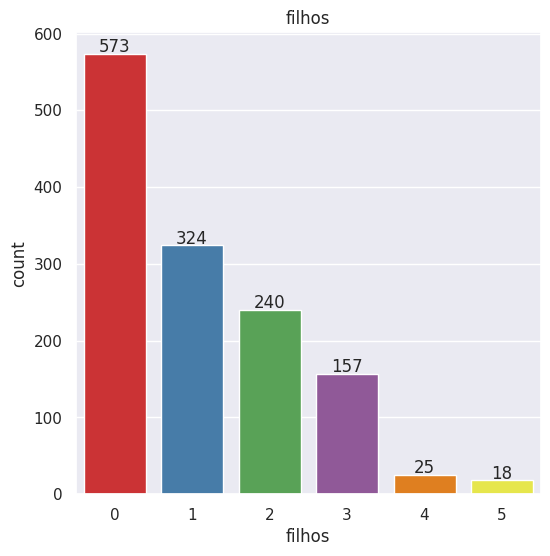

In [117]:
# Distribuição para coluna filhos
sns.set()
plt.figure(figsize=(6,6))
ax = sns.countplot(x='filhos', data=df_limpo, hue='filhos', palette='Set1', legend=False)
plt.title('filhos')

# Adiciona o valor da contagem no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

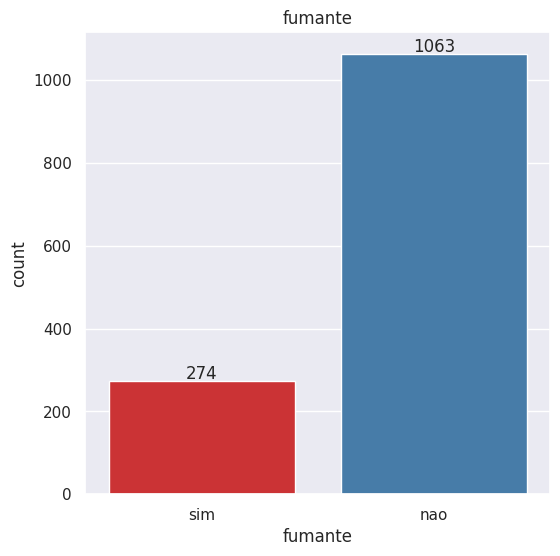

In [118]:
# Distribuição para coluna fumante
sns.set()
plt.figure(figsize=(6,6))
ax = sns.countplot(x='fumante', data=df_limpo, hue='fumante', palette='Set1', legend=False)
plt.title('fumante')

# Adiciona o valor da contagem no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

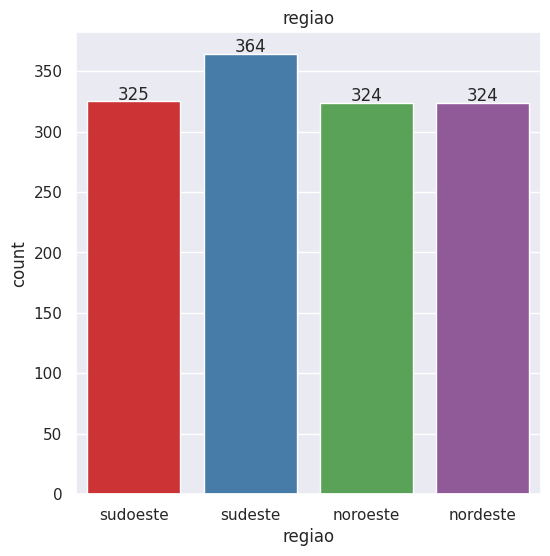

In [119]:
# Distribuição para coluna regiao
sns.set()
plt.figure(figsize=(6,6))
ax = sns.countplot(x='regiao', data=df_limpo, hue='regiao', palette='Set1', legend=False)
plt.title('regiao')

# Adiciona o valor da contagem no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

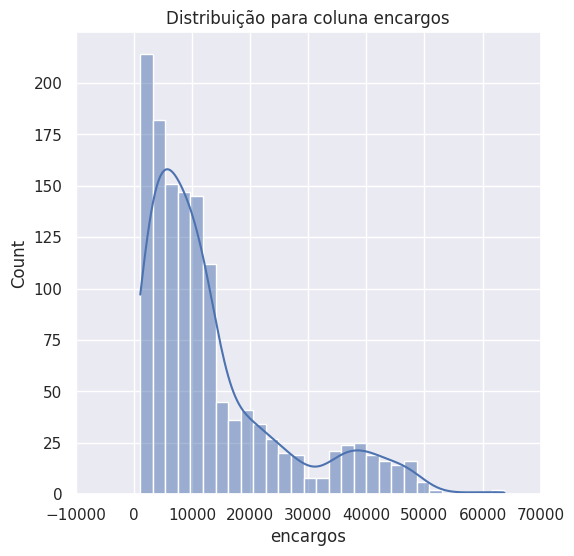

In [120]:
# Distribuição para coluna encargos
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(df_limpo['encargos'], kde=True)
plt.title('Distribuição para coluna encargos')
plt.xlim(-10000, 70000)
plt.show()

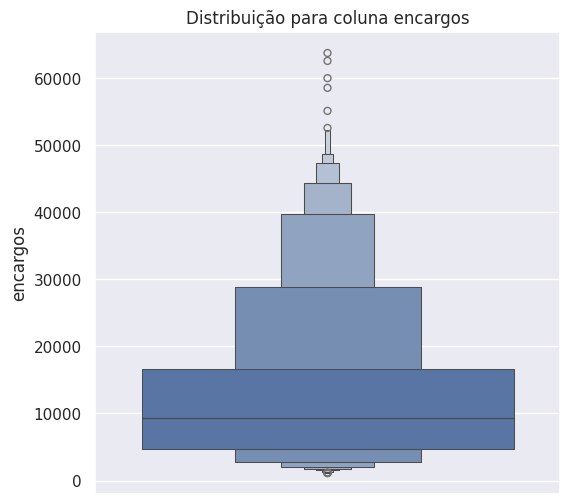

In [121]:
sns.set()
plt.figure(figsize=(6, 6))
sns.boxenplot(y='encargos', data=df_limpo)
plt.title('Distribuição para coluna encargos')
plt.show()

O histograma mostra a distribuição dos valores de Encargos de seguro médico ('encargos') no conjunto de dados. Abaixo, analisamos seus elementos-chave:

**Eixo X (encargos):** Representa os valores dos encargos de seguro, divididos em intervalos (as barras do histograma).

**Eixo Y (Count):** Mostra a quantidade de observações (pessoas) que se enquadram em cada intervalo de encargos.

**Forma da Distribuição:** O histograma revela que a distribuição dos encargos é **assimétrica à direita** (ou positivamente assimétrica). Isso significa que:

- A maioria dos encargos se concentra em valores mais baixos (lado esquerdo do gráfico).
- Há uma cauda longa se estendendo para a direita, indicando a presença de alguns encargos significativamente mais altos.

**Insights:**

- **Concentração de Encargos:** A maior parte das pessoas no conjunto de dados tem encargos de seguro relativamente baixos, provavelmente entre 2.000 e 15.000 dólares.
- **Valores Extremos (Outliers):** A cauda longa à direita sugere a presença de *outliers*, ou seja, valores de encargos excepcionalmente altos em comparação com a maioria dos dados. Esses outliers podem ser causados por diversos fatores, como problemas de saúde graves, tratamentos de alto custo ou outros fatores que aumentam significativamente as despesas médicas.
- **Assimetria:** A assimetria à direita é comum em dados financeiros e de saúde, pois geralmente há um limite inferior para os valores (por exemplo, zero), mas não há um limite superior definido.

**Importância para a Modelagem:**

A forma da distribuição dos encargos é importante para a escolha do modelo preditivo e para a interpretação dos resultados.

- **Modelos de Regressão:** A assimetria pode afetar a precisão de modelos de regressão linear, que assumem uma distribuição normal dos erros. Pode ser necessário transformar a variável 'encargos' (por exemplo, usando logaritmo) para torná-la mais simétrica.
- **Compreensão dos Custos:** O histograma fornece uma visão clara da distribuição dos custos de seguro médico no conjunto de dados. Isso pode ser útil para entender os padrões de custos e para identificar grupos de pessoas com diferentes níveis de risco.

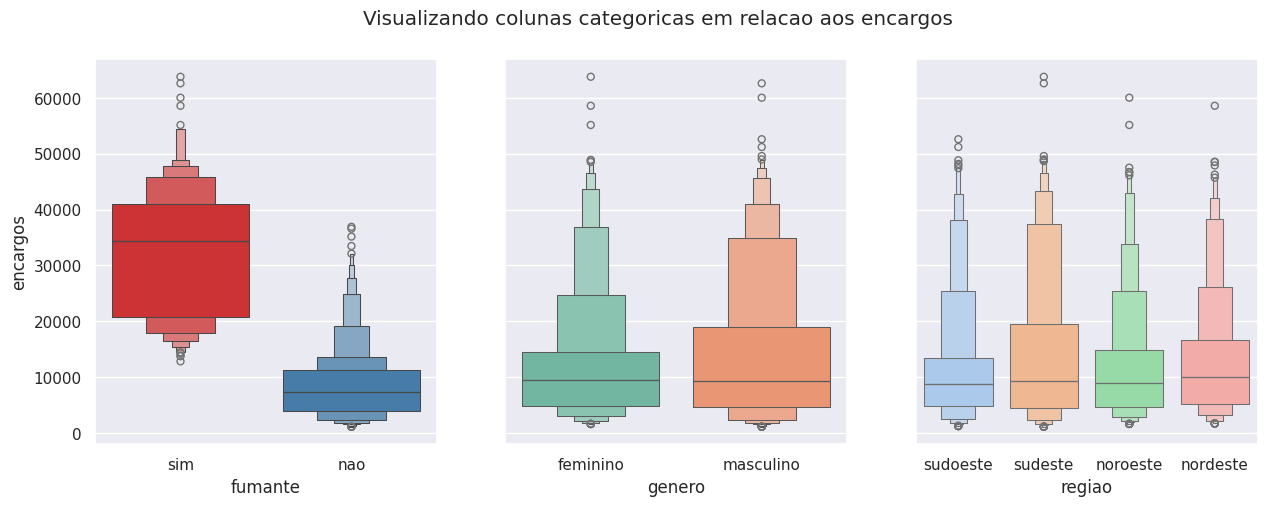

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Visualizando colunas categoricas em relacao aos encargos')

sns.boxenplot(x='fumante', y='encargos', data=df_limpo, ax=axes[0], hue='fumante', palette='Set1', legend=False)
sns.boxenplot(x='genero', y='encargos', data=df_limpo, ax=axes[1], hue='genero', palette='Set2', legend=False)
sns.boxenplot(x='regiao', y='encargos', data=df_limpo, ax=axes[2], hue='regiao', palette='pastel', legend=False)

plt.show()

## Pré-processamento de dados:

In [123]:
# Definicao das variaveis categoricas

variaveis_categoricas = df_limpo.select_dtypes(include=['object']).columns
variaveis_categoricas

Index(['genero', 'fumante', 'regiao'], dtype='object')

In [124]:
# Convertendo variáveis categóricas em formatos adequados para modelgagem
# Usando One-hot-enconding

df_dummies = pd.get_dummies(df_limpo[variaveis_categoricas]).astype(int)
df_dummies.head()

,genero_feminino,genero_masculino,fumante_nao,fumante_sim,regiao_nordeste,regiao_noroeste,regiao_sudeste,regiao_sudoeste
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [125]:
# Concatenando os dfs

df_modelagem = pd.concat([df_limpo.drop(variaveis_categoricas, axis=1), df_dummies], axis=1)
df_modelagem.head()

,idade,imc,filhos,encargos,genero_feminino,genero_masculino,fumante_nao,fumante_sim,regiao_nordeste,regiao_noroeste,regiao_sudeste,regiao_sudoeste
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [126]:
# Correlação com o custo médico
df_modelagem.corr()['encargos'].sort_values()

fumante_nao        -0.787234
genero_feminino    -0.058044
regiao_sudoeste    -0.043637
regiao_noroeste    -0.038695
regiao_nordeste     0.005945
genero_masculino    0.058044
filhos              0.067389
regiao_sudeste      0.073578
imc                 0.198401
idade               0.298308
fumante_sim         0.787234
encargos            1.000000
Name: encargos, dtype: float64

O código acima calcula a correlação de cada variável no com a coluna `encargos`, que representa os custos médicos. Vamos analisar os resultados, ordenados da menor para a maior correlação:

**Correlações Negativas:**

- **`fumante_nao (-0.787234)`:** Este é o fator com a correlação negativa mais forte. Indica que **não ser fumante está fortemente associado a menores custos médicos**.
- **`genero_feminino (-0.058044)`:** Há uma correlação negativa fraca, sugerindo que mulheres tendem a ter custos médicos ligeiramente menores do que homens.
- **`regiao_sudoeste (-0.043637), regiao_noroeste (-0.038695)`:**  Regiões geográficas também mostram correlações negativas fracas, com custos médicos um pouco menores nessas regiões.

**Correlações Positivas:**

- **`fumante_sim (0.787234)`:**  A correlação positiva mais forte. Ser fumante está **fortemente associado a maiores custos médicos**.
- **`idade (0.298308)`:** Uma correlação positiva moderada.  **Custos médicos tendem a aumentar com a idade**.
- **`imc (0.198401)`:**  Correlação positiva, indicando que **maior IMC está associado a maiores custos médicos**.
- **`regiao_sudeste (0.073578)`:** Uma correlação positiva fraca.
- **`filhos (0.067389), genero_masculino (0.058044)`:** Correlações positivas muito fracas.

**Observações:**

- **`encargos (1.000000)`:** A correlação da coluna consigo mesma é sempre 1.
- **`regiao_nordeste (0.005945)`:** Correlação próxima de zero, indicando que não há uma associação clara entre custos médicos e residir na região nordeste.

**Conclusões:**

- **Fumar é o fator mais importante**, com uma forte influência nos custos médicos. Pessoas que não fumam tendem a ter custos muito menores.
- **Idade e IMC** também são fatores importantes, embora com menor influência.
- **Gênero e região geográfica** parecem ter um impacto menor nos custos médicos, com algumas regiões mostrando correlações negativas fracas.

É importante lembrar que **correlação não implica causalidade**.

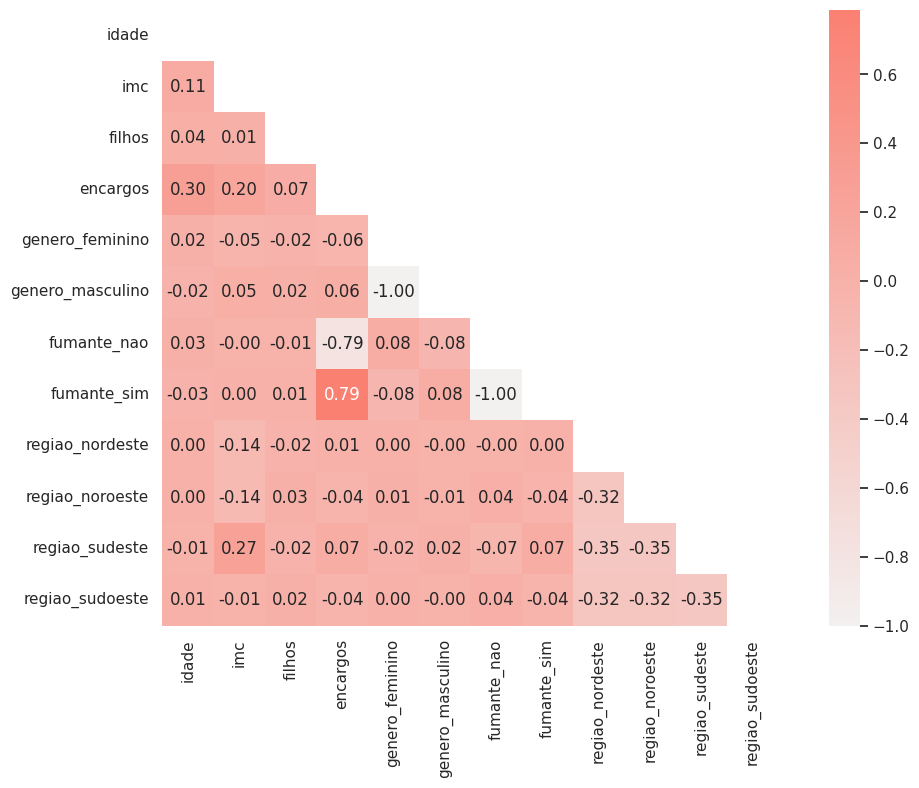

In [127]:
# Calcule a matriz de correlação

correlacao = df_modelagem.corr()

# Gere o heatmap de correlação

cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

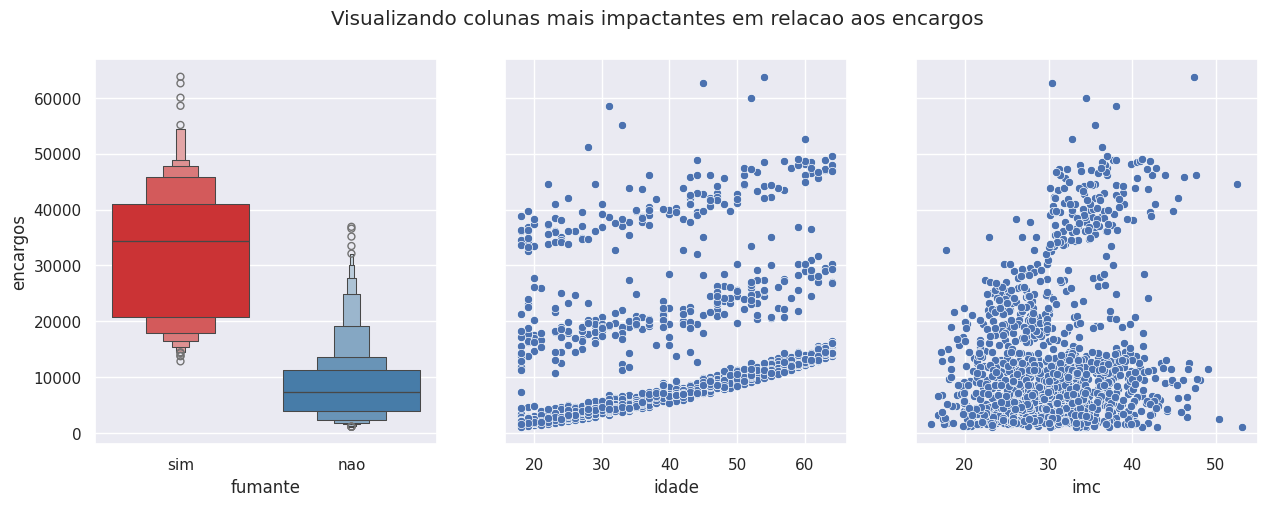

In [128]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Visualizando colunas mais impactantes em relacao aos encargos')

sns.boxenplot(x='fumante', y='encargos', data=df_limpo, ax=axes[0], hue='fumante', palette='Set1', legend=False)
sns.scatterplot(x='idade', y='encargos', data=df_limpo, ax=axes[1])
sns.scatterplot(x='imc', y='encargos', data=df_limpo, ax=axes[2])

plt.show()

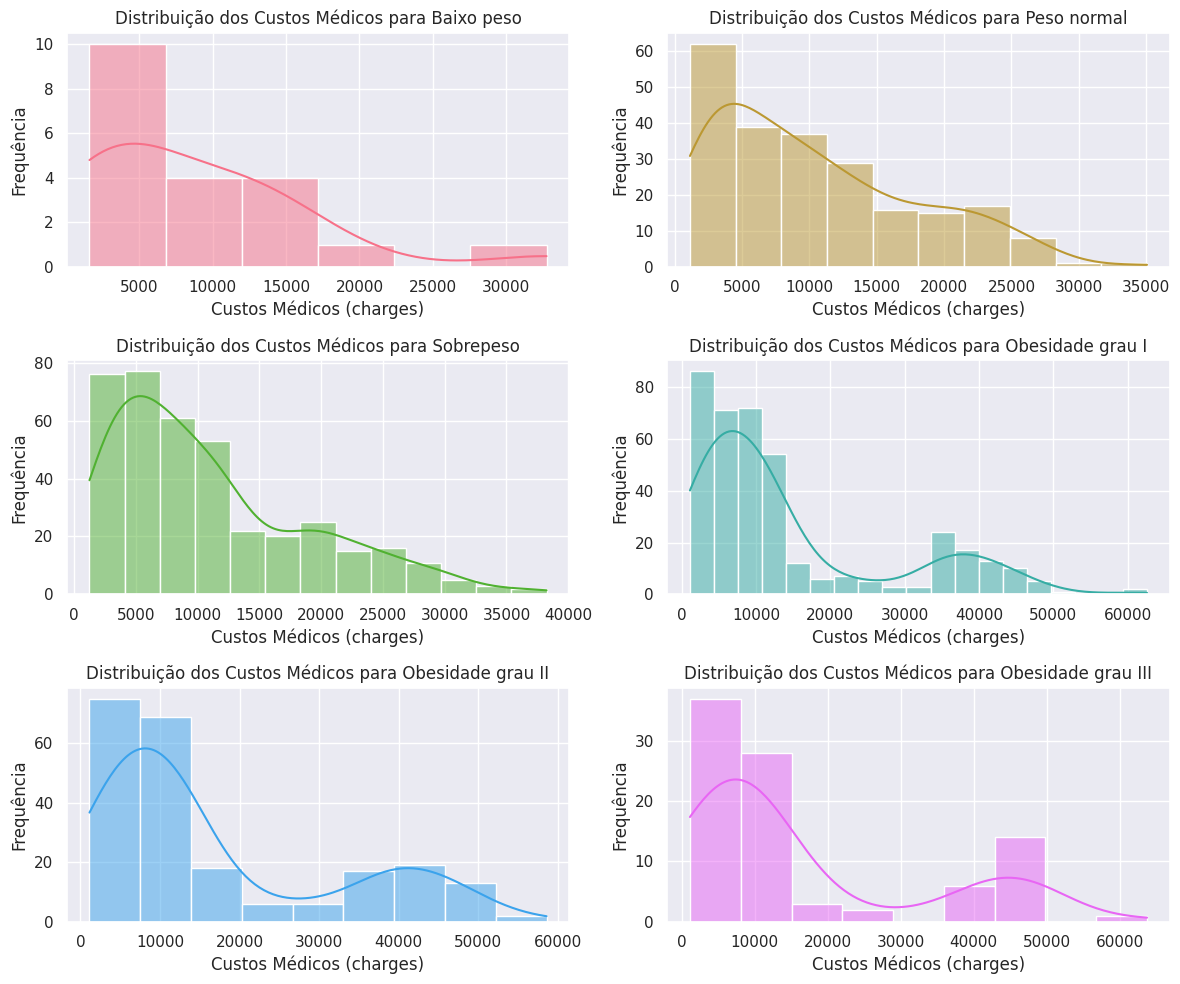

In [129]:
# Gráficos de encargos para imc

# Cria uma cópia do DataFrame
data_copy = df_renomeado.copy()

# Cria uma função para categorizar o IMC
def categorize_imc(imc):
    if imc < 18.5:
        return 'Baixo peso'
    elif 18.5 <= imc < 25:
        return 'Peso normal'
    elif 25 <= imc < 30:
        return 'Sobrepeso'
    elif 30 <= imc < 35:
        return 'Obesidade grau I'
    elif 35 <= imc < 40:
        return 'Obesidade grau II'
    else:
        return 'Obesidade grau III'

# Aplica a função à coluna 'imc' do DataFrame copiado e cria uma nova coluna 'categoria_imc'
data_copy['categoria_imc'] = data_copy['imc'].apply(categorize_imc)

# Cria um dicionário que mapeia cada categoria de IMC a um valor numérico correspondente ao intervalo do IMC
imc_ordernado = {
    'Baixo peso': 18.5,
    'Peso normal': 24.9,
    'Sobrepeso': 29.9,
    'Obesidade grau I': 34.9,
    'Obesidade grau II': 39.9,
    'Obesidade grau III': 40.0
}

# Obtém as categorias únicas de IMC
imc_categorias = sorted(data_copy['categoria_imc'].unique(), key=lambda x: imc_ordernado[x])

# Calcula o número de linhas e colunas da grade de subplots
n_linhas = (len(imc_categorias) + 1) // 2
n_colunas = 2

# Cria uma grade de subplots com o número calculado de linhas e colunas
fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(12, 10), squeeze=False)

# Define uma paleta de cores para os gráficos
cores = sns.color_palette("husl", len(imc_categorias))

# Plota a distribuição dos custos médicos (charges) para cada categoria de IMC usando sns.histplot
for i, categoria in enumerate(imc_categorias):
    linha = i // n_colunas
    coluna = i % n_colunas
    sns.histplot(data=data_copy[data_copy['categoria_imc'] == categoria], x='encargos', kde=True, ax=axs[linha, coluna], color=cores[i])
    axs[linha, coluna].set_title(f'Distribuição dos Custos Médicos para {categoria}')
    axs[linha, coluna].set_xlabel('Custos Médicos (charges)')
    axs[linha, coluna].set_ylabel('Frequência')

# Ajusta o layout da grade de subplots
plt.tight_layout()
plt.show()

## Modelagem / Treinamento e avaliação

In [130]:
# Dividindo conjuntos de dados em subconjuntos de treinamento e teste
X = df_modelagem.drop('encargos', axis=1)
y = df_modelagem['encargos']

In [131]:
SEED = 42
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [132]:
# Criando um modelo preditivo de regressão (RandomForestRegressor)
model = RandomForestRegressor(random_state=SEED)  # Inicializa um modelo RandomForest. 'random_state' garante resultados consistentes.

# Treinando o modelo
model.fit(X_treino, y_treino)  # Treina o modelo com os dados de treinamento.

# Previsões no conjunto de teste
y_pred = model.predict(X_teste)  # Faz previsões usando o conjunto de teste.

# **Calculando métricas de avaliação**
mae = mean_absolute_error(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_teste, y_pred)

# Imprime as métricas de avaliação do modelo base:
# MAE (Erro Absoluto Médio): Mede a média dos erros absolutos entre previsões e valores reais.
print("\nMétricas de Avaliação (Modelo Base):")
print(f'MAE (Erro Absoluto Médio): {mae}')

# MSE (Erro Quadrático Médio): Mede a média dos erros quadrados entre previsões e valores reais.
print(f'MSE (Erro Quadrático Médio): {mse}')

# RMSE (Raiz do Erro Quadrático Médio): A raiz quadrada do MSE, na mesma unidade do target.
print(f'RMSE (Raiz do Erro Quadrático Médio): {rmse}')

# R² (Coeficiente de Determinação): Mede a proporção da variância do target explicada pelo modelo.
print(f'R² (Coeficiente de Determinação): {r2}')


Métricas de Avaliação (Modelo Base):
MAE (Erro Absoluto Médio): 2563.595462848507
MSE (Erro Quadrático Médio): 21604001.054376133
RMSE (Raiz do Erro Quadrático Médio): 4648.010440433211
R² (Coeficiente de Determinação): 0.8824310851066982


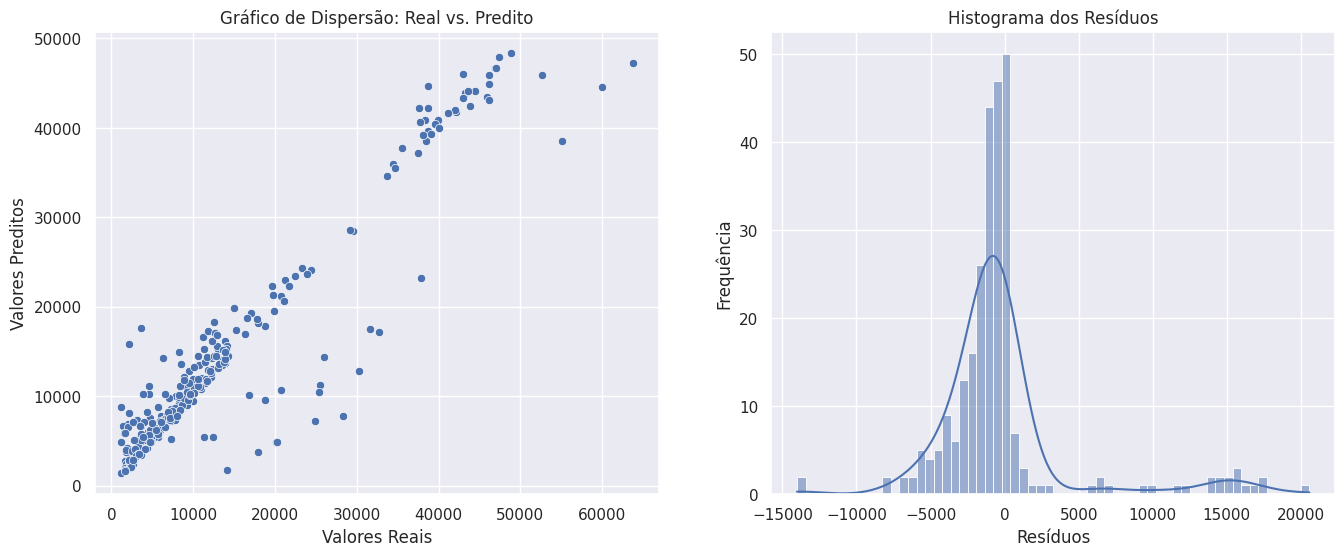

In [133]:
# Calcula os resíduos
residuos = y_teste - y_pred

# Cria a figura e os subplots na horizontal
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de dispersão dos valores reais vs. valores preditos
sns.scatterplot(x=y_teste, y=y_pred, ax=axes[0])
axes[0].set_xlabel('Valores Reais')
axes[0].set_ylabel('Valores Preditos')
axes[0].set_title('Gráfico de Dispersão: Real vs. Predito')

# Histograma dos resíduos
sns.histplot(residuos, kde=True, ax=axes[1])
axes[1].set_xlabel('Resíduos')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Histograma dos Resíduos')

plt.show()

## Otimização e Validação Estatística

In [134]:
# Otimização do Modelo com Validação Cruzada

# RandomizedSearchCV
# Define um dicionário 'param_dist' com hiperparâmetros do Random Forest e seus intervalos para busca.
param_dist = {'n_estimators': [50, 100, 200, 300],
              'max_depth': [5, 10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Inicializa RandomizedSearchCV para encontrar a melhor combinação de hiperparâmetros.
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=SEED)
# 'n_iter' define o número de combinações aleatórias de hiperparâmetros a serem testadas.
# 'cv' define o número de folds na validação cruzada.

# Treina o modelo usando RandomizedSearchCV (faz a busca aleatória por hiperparâmetros).
random_search.fit(X_treino, y_treino)

# Obtém o melhor modelo encontrado por RandomizedSearchCV.
best_random_model = random_search.best_estimator_

# GridSearchCV
# Define 'param_grid' com base nos melhores hiperparâmetros encontrados por RandomizedSearchCV, explorando valores próximos.
param_grid = {'n_estimators': [best_random_model.n_estimators - 25, best_random_model.n_estimators, best_random_model.n_estimators + 25],
              'max_depth': [max(1, best_random_model.max_depth - 5), best_random_model.max_depth, best_random_model.max_depth + 5],
              'min_samples_split': [best_random_model.min_samples_split - 1, best_random_model.min_samples_split, best_random_model.min_samples_split + 1],
              'min_samples_leaf': [best_random_model.min_samples_leaf - 1, best_random_model.min_samples_leaf, best_random_model.min_samples_leaf + 1]}

# Inicializa GridSearchCV para fazer uma busca exaustiva por hiperparâmetros dentro de 'param_grid'.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Treina o modelo usando GridSearchCV (faz a busca exaustiva por hiperparâmetros).
grid_search.fit(X_treino, y_treino)

# Obtém o melhor modelo encontrado por GridSearchCV.
best_grid_model = grid_search.best_estimator_

In [135]:
# Validação Estatística e Avaliação do Modelo Otimizado

# Previsões no conjunto de teste (modelo otimizado)
y_pred_optimized = best_grid_model.predict(X_teste)  # Faz previsões usando o modelo otimizado.

# Calculando métricas de avaliação (modelo otimizado)
# Calcula as mesmas métricas de avaliação para o modelo otimizado.
mae_optimized  = mean_absolute_error(y_teste, y_pred_optimized)
mse_optimized = mean_squared_error(y_teste, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
r2_optimized = r2_score(y_teste, y_pred_optimized)

# Imprime as métricas de avaliação do modelo base:
# MAE (Erro Absoluto Médio): Mede a média dos erros absolutos entre previsões e valores reais.
print("\nMétricas de Avaliação (Modelo Otimizado):")
print(f'MAE (Erro Absoluto Médio): {mae_optimized}')

# MSE (Erro Quadrático Médio): Mede a média dos erros quadrados entre previsões e valores reais.
print(f'MSE (Erro Quadrático Médio): {mse_optimized}')

# RMSE (Raiz do Erro Quadrático Médio): A raiz quadrada do MSE, na mesma unidade do target.
print(f'RMSE (Raiz do Erro Quadrático Médio): {rmse_optimized}')

# R² (Coeficiente de Determinação): Mede a proporção da variância do target explicada pelo modelo.
print(f'R² (Coeficiente de Determinação): {r2_optimized}')

# Comparando os Resultados
# Imprime uma comparação das métricas do modelo base e do modelo otimizado.
print("\nComparação de Resultados:")
print(f'MAE Modelo Base: {mae}')
print(f'MAE Modelo Otimizado: {mae_optimized}')

print(f'MSE Modelo Base: {mse}')
print(f'MSE Modelo Otimizado: {mse_optimized}')

print(f'RMSE Modelo Base: {rmse}')
print(f'RMSE Modelo Otimizado: {rmse_optimized}')

print(f'R² Modelo Base: {r2}')
print(f'R² Modelo Otimizado: {r2_optimized}')


Métricas de Avaliação (Modelo Otimizado):
MAE (Erro Absoluto Médio): 2424.9219454988993
MSE (Erro Quadrático Médio): 18023579.177254003
RMSE (Raiz do Erro Quadrático Médio): 4245.4186103674165
R² (Coeficiente de Determinação): 0.9019157312097041

Comparação de Resultados:
MAE Modelo Base: 2563.595462848507
MAE Modelo Otimizado: 2424.9219454988993
MSE Modelo Base: 21604001.054376133
MSE Modelo Otimizado: 18023579.177254003
RMSE Modelo Base: 4648.010440433211
RMSE Modelo Otimizado: 4245.4186103674165
R² Modelo Base: 0.8824310851066982
R² Modelo Otimizado: 0.9019157312097041


Análise Comparativa dos Modelos de Regressão

A otimização do modelo resultou em melhorias significativas em todas as métricas de avaliação.

**Comparação das Métricas:**

| Métrica          | Modelo Base | Modelo Otimizado | Melhoria (%) |
|------------------|------------|-----------------|---------------|
| MAE              | 2563.59   | 2424.92        | 5.4%        |
| MSE              | 21604001.05| 18023579.18     | 16.6%       |
| RMSE             | 4648.01   | 4245.42        | 8.7%        |
| R²               | 0.882      | 0.902          | 2.3%        |

**Análise:**

* **Redução do Erro:** O modelo otimizado apresenta uma redução notável nos erros MAE, MSE e RMSE, indicando que as previsões estão mais próximas dos valores reais.
* **Aumento do R²:** O R² do modelo otimizado aumentou, o que significa que o modelo otimizado explica uma proporção maior da variância nos custos médicos em relação ao modelo base.

**Conclusão:**

A otimização do modelo resultou em um modelo com melhor capacidade de previsão, evidenciado pela redução dos erros e aumento do R². Isso demonstra a importância do processo de otimização para aprimorar o desempenho dos modelos de regressão.

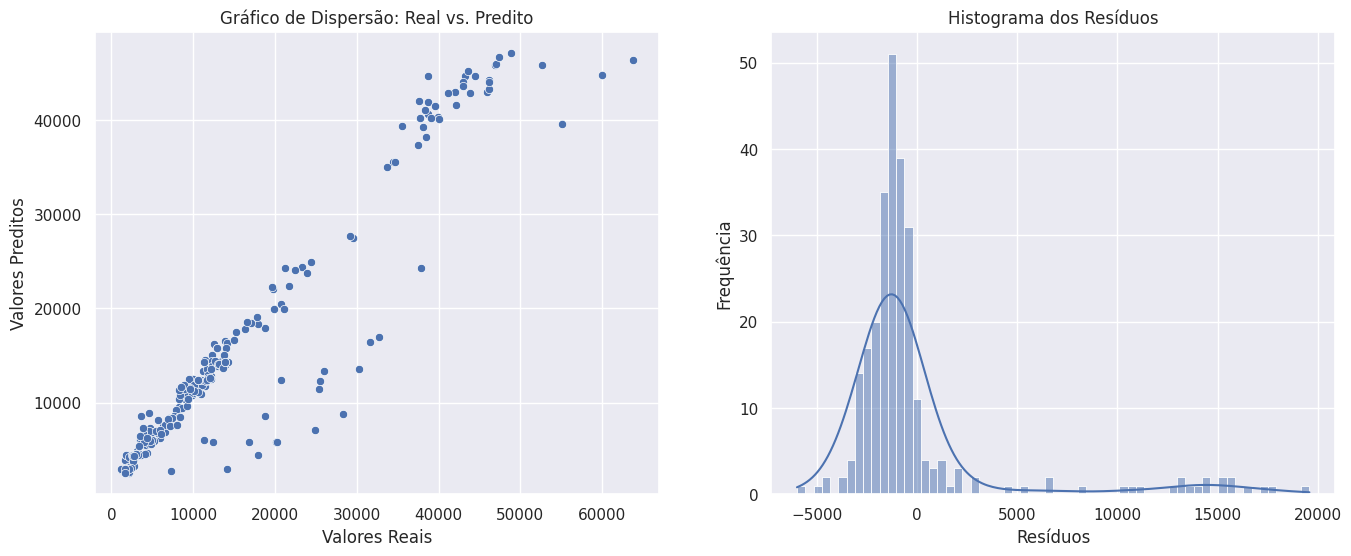

In [136]:
# Calcula os resíduos Modelo Otimizado
residuos = y_teste - y_pred_optimized

# Cria a figura e os subplots na horizontal
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de dispersão dos valores reais vs. valores preditos
sns.scatterplot(x=y_teste, y=y_pred_optimized, ax=axes[0])
axes[0].set_xlabel('Valores Reais')
axes[0].set_ylabel('Valores Preditos')
axes[0].set_title('Gráfico de Dispersão: Real vs. Predito')

# Histograma dos resíduos Modelo Otimizado
sns.histplot(residuos, kde=True, ax=axes[1])
axes[1].set_xlabel('Resíduos')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Histograma dos Resíduos')

plt.show()

In [137]:
# Calculando o valor p e os intervalos de confiança
# Utiliza a biblioteca statsmodels para análise estatística adicional.
import statsmodels.api as sm

# Adiciona uma constante ao conjunto de dados (necessário para statsmodels).
X_treino_const = sm.add_constant(X_treino)

# Ajusta um modelo de Regressão Linear (OLS).
model_ols_optimized = sm.OLS(y_treino, X_treino_const).fit()

# Imprime o resumo do modelo OLS, que inclui valor p, intervalos de confiança, etc.
print("\nResumo do Modelo OLS:")
print(model_ols_optimized.summary())


Resumo do Modelo OLS:
                            OLS Regression Results                            
Dep. Variable:               encargos   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     358.1
Date:                Mon, 20 May 2024   Prob (F-statistic):          4.94e-295
Time:                        14:24:00   Log-Likelihood:                -10831.
No. Observations:                1069   AIC:                         2.168e+04
Df Residuals:                    1060   BIC:                         2.172e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            

Analisando os p-values e Intervalos de Confiança

O resumo do modelo OLS fornece informações valiosas sobre a significância estatística das variáveis ​​independentes (ou preditoras) em relação à variável dependente ("encargos").  Vamos focar nas colunas "P>|t|" (p-value) e "[0.025 0.975]" (intervalo de confiança de 95%):

**P-value (P>|t|):**

* **Variáveis Significativas:** Um p-value menor que 0.05 indica que a variável é estatisticamente significativa. Neste caso, as variáveis com p-values menores que 0.05 são:
    * **idade:** (p-value = 0.000)
    * **imc:** (p-value = 0.000)
    * **filhos:** (p-value = 0.001)
    * **fumante_nao:** (p-value = 0.000)
    * **fumante_sim:** (p-value = 0.000)
    * Isso significa que, com 95% de confiança, podemos rejeitar a hipótese nula de que essas variáveis não têm efeito sobre os encargos de saúde. Em outras palavras, elas têm uma influência significativa no valor dos encargos.

* **Variáveis Não Significativas:** Um p-value maior que 0.05 sugere que a variável não é estatisticamente significativa. As variáveis com p-values maiores que 0.05 são:
    * **genero_feminino:** (p-value = 0.912)
    * **genero_masculino:** (p-value = 0.826)
    * **regiao_nordeste:** (p-value = 0.173)
    * **regiao_noroeste:** (p-value = 0.832)
    * **regiao_sudeste:** (p-value = 0.316)
    * **regiao_sudoeste:** (p-value = 0.574)
    * Para essas variáveis, não temos evidências suficientes para rejeitar a hipótese nula. Ou seja, não podemos afirmar com 95% de confiança que elas afetam os encargos de saúde.

**Intervalo de Confiança de 95% ([0.025 0.975]):**

* Os intervalos de confiança fornecem uma estimativa do intervalo em que o verdadeiro valor do coeficiente da variável se encontra, com 95% de confiança.
* **Variáveis Significativas:** Observe que os intervalos de confiança para as variáveis significativas não incluem o zero. Isso corrobora a conclusão do p-value de que essas variáveis têm um efeito significativo.
* **Variáveis Não Significativas:** Os intervalos de confiança para as variáveis não significativas *incluem* o zero. Isso significa que o verdadeiro valor do coeficiente pode ser zero, ou seja, a variável pode não ter nenhum efeito real sobre os encargos.

**Observações:**

* **Constante (const):** A constante (intercept) também possui um p-value alto (0.944) e um intervalo de confiança que inclui o zero. Isso significa que, no contexto deste modelo, a constante não é significativamente diferente de zero.
* **Multicolinearidade:** A nota "[2]" no final do resumo do modelo alerta para a possibilidade de multicolinearidade (alta correlação entre as variáveis independentes). Isso pode afetar a precisão dos coeficientes e p-values, principalmente para as variáveis "genero" e "regiao".

**Conclusões:**

A análise dos p-values e intervalos de confiança indica que:

* A idade, o IMC, o número de filhos e o status de fumante são preditores estatisticamente significativos dos encargos de saúde.
* Não há evidências suficientes para concluir que o gênero ou a região geográfica influenciam significativamente os encargos, considerando a multicolinearidade possível entre as variáveis.

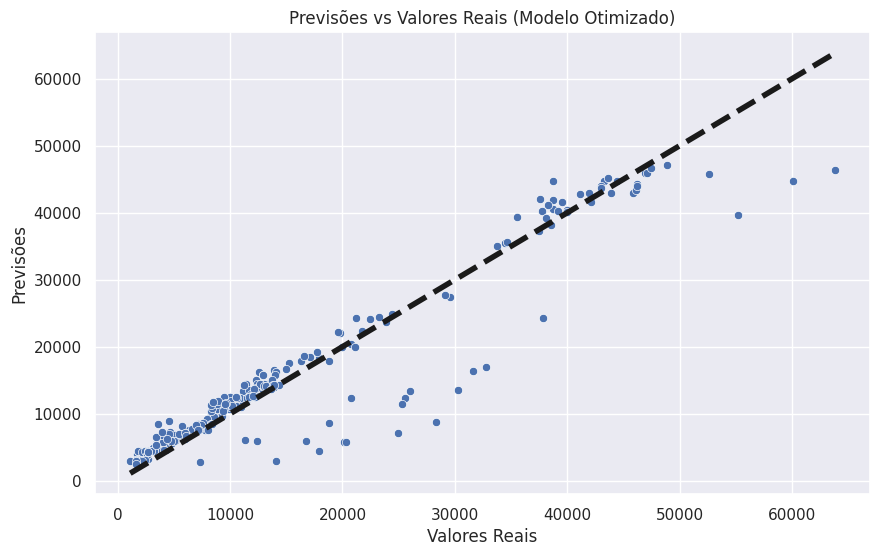

In [138]:
# Resultados Visuais

# Gráfico de Previsões vs Valores Reais (Modelo Otimizado)
# Plota um gráfico de dispersão para comparar previsões do modelo otimizado com valores reais.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste, y=y_pred_optimized)
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=4)
plt.title('Previsões vs Valores Reais (Modelo Otimizado)')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()

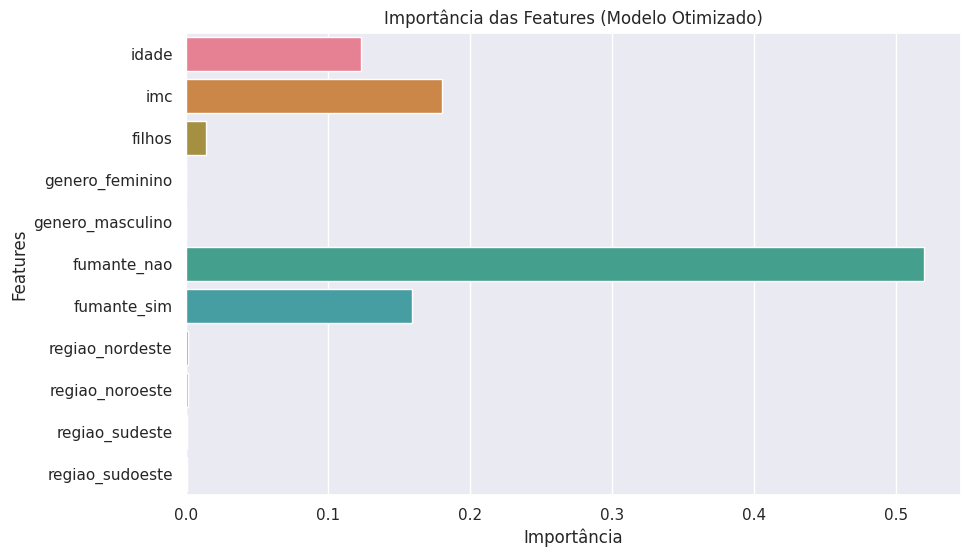

In [139]:
# Importância das Features (Modelo Otimizado)
feature_importances_optimized = best_grid_model.feature_importances_
features = X_teste.columns
plt.figure(figsize=(10, 6))

# Cria uma paleta de cores com a mesma quantidade de features
cores = sns.color_palette("husl", len(features))

sns.barplot(x=feature_importances_optimized, y=features, orient="h", hue=features, palette=cores, dodge=False, legend=False)
plt.title('Importância das Features (Modelo Otimizado)')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.show()

In [82]:
# Exportando o modelo
# Salva o modelo otimizado em um arquivo pickle para uso posterior.
pickle.dump(best_grid_model, open('modelo_previsao_custos_otimizado.pkl', 'wb'))

In [83]:
# Criando uma função para previsões
# Define uma função para fazer previsões usando o modelo otimizado.
def prever_custos(idade, genero, imc, filhos, fumante, regiao):
  # Criando um DataFrame para as entradas
  input_data = pd.DataFrame({'idade': [idade],
                             'genero': [genero],
                             'imc': [imc],
                             'filhos': [filhos],
                             'fumante': [fumante],
                             'regiao': [regiao]})

  variaveis_categoricas = input_data.select_dtypes(include=['object']).columns

  input_data_dummies = pd.get_dummies(input_data[variaveis_categoricas]).astype(int)

  input_data_colunas = pd.DataFrame({'genero_feminino': [0], 'genero_masculino': [0],
                                  'fumante_nao': [0], 'fumante_sim': [0], 'regiao_nordeste': [0],
                                   'regiao_noroeste': [0], 'regiao_sudeste': [0], 'regiao_sudoeste': [0]})

  for coluna in input_data_dummies.columns:
    if coluna in input_data_colunas.columns:
      input_data_colunas[coluna] = input_data_dummies[coluna]


  input_data_modelagem = pd.concat([input_data.drop(variaveis_categoricas, axis=1), input_data_colunas], axis=1)


  # Faz a previsão usando o modelo otimizado.
  previsao = best_grid_model.predict(input_data_modelagem)[0]

  return previsao

In [ ]:
# Exemplo de uso da função
# Demonstra como usar a função 'prever_custos' para fazer uma previsão.

# Seleciona uma linha aleatória do DataFrame
linha_aleatoria = np.random.randint(0, len(df_limpo) - 1)
registro = df_limpo.iloc[linha_aleatoria]

# Atribui os valores das colunas às variáveis
idade = registro['idade']
genero = registro['genero']
imc = registro['imc']
filhos = registro['filhos']
fumante = registro['fumante']
regiao = registro['regiao']
encargos = registro['encargos']

previsao = prever_custos(idade, genero, imc, filhos, fumante, regiao)

print("\nPrevisão de Custos para um Indivíduo:")
print("Idade:", idade)
print("Genero:", genero)
print("IMC:", imc)
print("Filhos:", filhos)
print("Fumante:", fumante)
print("Região:", regiao)
print("Previsão de Custos:", previsao)
print("Custo original:", encargos)


Previsão de Custos para um Indivíduo:
Idade: 62
Genero: masculino
IMC: 32.015
Filhos: 0
Fumante: sim
Região: nordeste
Previsão de Custos: 45854.746813539314
Custo original: 45710.20785


## Aumentando os registros do dataset

In [140]:
# função para aumentar os dados
# df é o DataFrame original
# linhas_alvo é o tamanho total do novo dataset

def aumentar_dados(df, linhas_alvo):

    dados_aumentados = df.copy()

    while len(dados_aumentados) < linhas_alvo:

        # Escolhe aleatoriamente uma linha para ser o ponto de partida
        linha_base = df.sample(n=1)

        # Para 'idade', adiciona um ruído discreto e garante que seja um número inteiro e >= 18
        ruido = np.random.randint(-2, 3)  # Ruído entre -2 e 2
        linha_base['idade'] = np.clip(linha_base['idade'] + ruido, 18, None).astype(int)

        # Para 'filhos', adiciona um ruído discreto e garante que seja um número inteiro >= 0
        linha_base['filhos'] = np.clip(linha_base['filhos'] + np.random.randint(-1, 2), 0, None).astype(int)

        # 'genero' escolhe aleatoriamente entre as opções existentes
        linha_base['genero'] = np.random.choice(['masculino', 'feminino'])

        # O atributo 'fumante' permanece o mesmo da linha original
        linha_base['fumante'] = linha_base['fumante']

        # Para 'imc' e 'encargos', escolhe aleatoriamente entre adicionar ou subtrair 10% de ruído
        for col in ['imc', 'encargos']:
            fator_ruido = np.random.choice([0.9, 1.1])  # 10% de ruído para baixo ou para cima
            linha_base[col] *= fator_ruido
            linha_base[col] = linha_base[col].astype(float)

        # O atributo 'regiao' permanece o mesmo da linha original
        linha_base['regiao'] = linha_base['regiao']

        # Adiciona a linha modificada ao conjunto de dados aumentado
        dados_aumentados = pd.concat([dados_aumentados, linha_base], ignore_index=True)

    return dados_aumentados.iloc[:linhas_alvo]

In [141]:
# vamos aumentar nossa base
df_aumentado = aumentar_dados(df_limpo, 10000)
df_aumentado

,idade,genero,imc,filhos,fumante,regiao,encargos
0,19,feminino,27.900,0,sim,sudoeste,16884.92400
1,18,masculino,33.770,1,nao,sudeste,1725.55230
2,28,masculino,33.000,3,nao,sudeste,4449.46200
3,33,masculino,22.705,0,nao,noroeste,21984.47061
4,32,masculino,28.880,0,nao,noroeste,3866.85520
...,...,...,...,...,...,...,...
9995,46,masculino,26.730,0,nao,sudeste,7010.67150
9996,54,masculino,28.215,0,nao,noroeste,12599.42365
9997,57,masculino,32.791,0,sim,sudeste,24780.52161
9998,57,masculino,25.830,0,nao,sudoeste,12600.80800


In [142]:
# Definicao das variaveis categoricas
variaveis_categoricas_aumentado = df_aumentado.select_dtypes(include=['object']).columns

# Convertendo variáveis categóricas em formatos adequados para modelgagem
# Usando One-hot-enconding
df_dummies_aumentado = pd.get_dummies(df_aumentado[variaveis_categoricas_aumentado]).astype(int)

# Concatenando os dfs
df_modelagem_aumentado = pd.concat([df_aumentado.drop(variaveis_categoricas_aumentado, axis=1), df_dummies_aumentado], axis=1)
df_modelagem_aumentado

,idade,imc,filhos,encargos,genero_feminino,genero_masculino,fumante_nao,fumante_sim,regiao_nordeste,regiao_noroeste,regiao_sudeste,regiao_sudoeste
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,46,26.730,0,7010.67150,0,1,1,0,0,0,1,0
9996,54,28.215,0,12599.42365,0,1,1,0,0,1,0,0
9997,57,32.791,0,24780.52161,0,1,0,1,0,0,1,0
9998,57,25.830,0,12600.80800,0,1,1,0,0,0,0,1


In [143]:
# Dividindo conjuntos de dados em subconjuntos de treinamento e teste
X_aumentado = df_modelagem_aumentado.drop('encargos', axis=1)
y_aumentado = df_modelagem_aumentado['encargos']

X_treino_aumentado, X_teste_aumentado, y_treino_aumentado, y_teste_aumentado = train_test_split(X_aumentado, y_aumentado, test_size=0.2, random_state=SEED)

In [144]:
# Criando um modelo preditivo de regressão (RandomForestRegressor)
model_aumentado = RandomForestRegressor(random_state=SEED)  # Inicializa um modelo RandomForest. 'random_state' garante resultados consistentes.

# Treinando o modelo
model_aumentado.fit(X_treino_aumentado, y_treino_aumentado)  # Treina o modelo com os dados de treinamento.

# Previsões no conjunto de teste
y_pred_aumetado = model_aumentado.predict(X_teste_aumentado)  # Faz previsões usando o conjunto de teste.

# **Calculando métricas de avaliação**
mae_aumentado = mean_absolute_error(y_teste_aumentado, y_pred_aumetado)
mse_aumentado = mean_squared_error(y_teste_aumentado, y_pred_aumetado)
rmse_aumentado = np.sqrt(mse_aumentado)
r2_aumentado = r2_score(y_teste_aumentado, y_pred_aumetado)

# Imprime as métricas de avaliação do modelo base:
# MAE (Erro Absoluto Médio): Mede a média dos erros absolutos entre previsões e valores reais.
print("\nMétricas de Avaliação (Modelo Base):")
print(f'MAE (Erro Absoluto Médio): {mae_aumentado}')

# MSE (Erro Quadrático Médio): Mede a média dos erros quadrados entre previsões e valores reais.
print(f'MSE (Erro Quadrático Médio): {mse_aumentado}')

# RMSE (Raiz do Erro Quadrático Médio): A raiz quadrada do MSE, na mesma unidade do target.
print(f'RMSE (Raiz do Erro Quadrático Médio): {rmse_aumentado}')

# R² (Coeficiente de Determinação): Mede a proporção da variância do target explicada pelo modelo.
print(f'R² (Coeficiente de Determinação): {r2_aumentado}')


Métricas de Avaliação (Modelo Base):
MAE (Erro Absoluto Médio): 2507.241103845655
MSE (Erro Quadrático Médio): 17718960.065605965
RMSE (Raiz do Erro Quadrático Médio): 4209.389512222166
R² (Coeficiente de Determinação): 0.8825152106986365


In [145]:
# Otimização do Modelo com Validação Cruzada

# Inicializa RandomizedSearchCV para encontrar a melhor combinação de hiperparâmetros.
random_search_aumentado = RandomizedSearchCV(estimator=model_aumentado, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=SEED)
# 'n_iter' define o número de combinações aleatórias de hiperparâmetros a serem testadas.
# 'cv' define o número de folds na validação cruzada.

# Treina o modelo usando RandomizedSearchCV (faz a busca aleatória por hiperparâmetros).
random_search_aumentado.fit(X_treino_aumentado, y_treino_aumentado)

# Obtém o melhor modelo encontrado por RandomizedSearchCV.
best_random_model_aumentado = random_search_aumentado.best_estimator_

# GridSearchCV
# Inicializa GridSearchCV para fazer uma busca exaustiva por hiperparâmetros dentro de 'param_grid'.
grid_search_aumentado = GridSearchCV(estimator=model_aumentado, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Treina o modelo usando GridSearchCV (faz a busca exaustiva por hiperparâmetros).
grid_search_aumentado.fit(X_treino_aumentado, y_treino_aumentado)

# Obtém o melhor modelo encontrado por GridSearchCV.
best_grid_model_aumentado = grid_search_aumentado.best_estimator_

In [146]:
# Validação Estatística e Avaliação do Modelo Otimizado

# Previsões no conjunto de teste (modelo otimizado)
y_pred_optimized_aumentado = best_grid_model_aumentado.predict(X_teste_aumentado)  # Faz previsões usando o modelo otimizado.

# Calculando métricas de avaliação (modelo otimizado)
# Calcula as mesmas métricas de avaliação para o modelo otimizado.
mae_optimized_aumentado  = mean_absolute_error(y_teste_aumentado, y_pred_optimized_aumentado)
mse_optimized_aumentado = mean_squared_error(y_teste_aumentado, y_pred_optimized_aumentado)
rmse_optimized_aumentado = np.sqrt(mse_optimized_aumentado)
r2_optimized_aumentado = r2_score(y_teste_aumentado, y_pred_optimized_aumentado)

# Imprime as métricas de avaliação do modelo base:
# MAE (Erro Absoluto Médio): Mede a média dos erros absolutos entre previsões e valores reais.
print("\nMétricas de Avaliação (Modelo Otimizado):")
print(f'MAE (Erro Absoluto Médio): {mae_optimized_aumentado}')

# MSE (Erro Quadrático Médio): Mede a média dos erros quadrados entre previsões e valores reais.
print(f'MSE (Erro Quadrático Médio): {mse_optimized_aumentado}')

# RMSE (Raiz do Erro Quadrático Médio): A raiz quadrada do MSE, na mesma unidade do target.
print(f'RMSE (Raiz do Erro Quadrático Médio): {rmse_optimized_aumentado}')

# R² (Coeficiente de Determinação): Mede a proporção da variância do target explicada pelo modelo.
print(f'R² (Coeficiente de Determinação): {r2_optimized_aumentado}')

# Comparando os Resultados
# Imprime uma comparação das métricas do modelo base e do modelo otimizado.
print("\nComparação de Resultados:")
print(f'MAE Modelo Otimizado Aumentado: {mae_optimized_aumentado}')
print(f'MAE Modelo Otimizado: {mae_optimized}')

print(f'MSE Modelo Otimizado Aumentado: {mse_optimized_aumentado}')
print(f'MSE Modelo Otimizado: {mse_optimized}')

print(f'RMSE Modelo Otimizado Aumentado: {rmse_optimized_aumentado}')
print(f'RMSE Modelo Otimizado: {rmse_optimized}')

print(f'R² Modelo Otimizado Aumentado: {r2_optimized_aumentado}')
print(f'R² Modelo Otimizado: {r2_optimized}')


Métricas de Avaliação (Modelo Otimizado):
MAE (Erro Absoluto Médio): 2592.7773225598976
MSE (Erro Quadrático Médio): 18814131.76388197
RMSE (Raiz do Erro Quadrático Médio): 4337.525995758639
R² (Coeficiente de Determinação): 0.8752537226799053

Comparação de Resultados:
MAE Modelo Otimizado Aumentado: 2592.7773225598976
MAE Modelo Otimizado: 2424.9219454988993
MSE Modelo Otimizado Aumentado: 18814131.76388197
MSE Modelo Otimizado: 18023579.177254003
RMSE Modelo Otimizado Aumentado: 4337.525995758639
RMSE Modelo Otimizado: 4245.4186103674165
R² Modelo Otimizado Aumentado: 0.8752537226799053
R² Modelo Otimizado: 0.9019157312097041


Esta análise comparativa avaliou o desempenho de dois modelos de previsão: um **Modelo Otimizado** e um **Modelo Otimizado Aumentado**. O modelo aumentado foi treinado com um dataset expandido, enquanto o modelo original utilizou o dataset original. Os resultados indicam que:

* **MAE (Erro Médio Absoluto):** O Modelo Otimizado Aumentado apresentou um MAE de 2592.78, enquanto o Modelo Otimizado obteve um MAE de 2424.92. Essa diferença sugere que o modelo aumentado possui um erro de previsão ligeiramente maior.
* **MSE (Erro Quadrático Médio):** O MSE do Modelo Otimizado Aumentado foi de 18814131.76, enquanto o MSE do Modelo Otimizado foi de 18023579.18. Novamente, o modelo aumentado apresentou um valor ligeiramente maior, indicando uma maior variância nos erros de previsão.
* **RMSE (Raiz Quadrada do Erro Quadrático Médio):** O RMSE do Modelo Otimizado Aumentado foi de 4337.53, enquanto o Modelo Otimizado apresentou um RMSE de 4245.42. Essa métrica corrobora as observações anteriores, sugerindo que o modelo aumentado possui uma maior dispersão nos erros de previsão.
* **R² (Coeficiente de Determinação):** O Modelo Otimizado Aumentado obteve um R² de 0.8753, enquanto o Modelo Otimizado alcançou um R² de 0.9019. O R² indica a proporção da variância dos dados explicada pelo modelo. Neste caso, o modelo original apresentou um R² ligeiramente maior, sugerindo que ele consegue explicar melhor a variabilidade dos dados.

**Em resumo, embora o Modelo Otimizado Aumentado tenha apresentado um desempenho ligeiramente inferior em termos de MAE, MSE e RMSE, ele obteve um R² menor. Isso sugere que o aumento do dataset pode ter impactado negativamente a capacidade do modelo de generalizar para novos dados.**